In [383]:


import pandas as pd
import numpy as np
import pymysql
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")
from sklearn.preprocessing import OneHotEncoder, LabelEncoder


In [12]:
host = "mudatabase.cr4neufosdwe.ap-northeast-2.rds.amazonaws.com"
port = 3306
username = "mu"
database = "mudatabase"
password = "munanodb"


In [61]:
conn = pymysql.connect(host = host , user = username, passwd = password, db = database, port = port,
                       use_unicode= True, charset= "utf8")

cursor = conn.cursor()
query = "show tables"

cursor.execute(query)
tables = cursor.fetchall()
table_name = [i[0] for i in tables]
table_name

['eco_macro', 'population', 'rent', 'rent_re', 'sell', 'sell_re']

In [71]:
for i in table_name:
    query = "select * from mudatabase.{0}".format(i)
    cursor.execute(query)
    result = cursor.fetchall()
    exec(f"df_{i} = pd.DataFrame(result)")

    

In [528]:
conn = pymysql.connect(host = host , user = username, passwd = password, db = database, port = port,
                       use_unicode= True, charset= "utf8")

cursor = conn.cursor(pymysql.cursors.DictCursor)


In [529]:
query = """select
	date_format(a.date, '%Y-%m') as date,
    a.gu,
    a.dong,
    a.area,
    a.floor,
    a.built,
    a.doro,
    a.tradetype,
    a.price,
    b.interest,
    b.growth,
    b.unemployment,
    b.inflation,
    b.stock,
    b.house_debit,
    b.ex_dallar,
    b.ex_yen,
    c.household,
    c.pop,
    c.male_kor,
    c.female_kor,
    c.male_for,
    c.female_for,
    c.perhold,
    c.senior
from
	sell_re as a,
    eco_macro as b,
    population as c
where
	date_format(a.date, '%Y-%m') = date_format(b.date, '%Y-%m')
    and date_format(a.date, '%Y-%m') = date_format(c.date, '%Y-%m')
    and a.dong = c.dong
    ;
"""

cursor.execute(query)
result = cursor.fetchall()
df = pd.DataFrame(result)

In [530]:
pd.options.display.max_columns = None
df.head()

,date,gu,dong,area,floor,built,doro,tradetype,price,interest,growth,unemployment,inflation,stock,house_debit,ex_dallar,ex_yen,household,pop,male_kor,female_kor,male_for,female_for,perhold,senior
0,2016-01,강남구,논현1동,33.54,13,2003,도산대로 158,4,23700,1.5,1.14847,3.7,2.9939,1894.65,1223653.9,1201.67,1017.44,14471,25235,11401,13291,258,285,1.71,2507
1,2016-01,강남구,논현1동,64.78,3,1991,봉은사로 129,4,28300,1.5,1.14847,3.7,2.9939,1894.65,1223653.9,1201.67,1017.44,14471,25235,11401,13291,258,285,1.71,2507
2,2016-01,강남구,개포4동,28.30,-1,1997,개포로15길 30,1,8000,1.5,1.14847,3.7,2.9939,1894.65,1223653.9,1201.67,1017.44,8480,20432,10013,10237,80,102,2.39,1898
3,2016-01,강남구,논현1동,75.85,2,2001,학동로23길 59,1,48800,1.5,1.14847,3.7,2.9939,1894.65,1223653.9,1201.67,1017.44,14471,25235,11401,13291,258,285,1.71,2507
4,2016-01,강남구,도곡2동,16.98,5,2012,논현로26길 36-5,1,14000,1.5,1.14847,3.7,2.9939,1894.65,1223653.9,1201.67,1017.44,12072,35246,16368,18738,76,64,2.91,3576


In [531]:
# 길, 로, 대로
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346791 entries, 0 to 346790
Data columns (total 25 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   date          346791 non-null  object 
 1   gu            346791 non-null  object 
 2   dong          346791 non-null  object 
 3   area          346791 non-null  float64
 4   floor         346791 non-null  int64  
 5   built         346791 non-null  int64  
 6   doro          346791 non-null  object 
 7   tradetype     346791 non-null  object 
 8   price         346791 non-null  int64  
 9   interest      346791 non-null  float64
 10  growth        346791 non-null  float64
 11  unemployment  346791 non-null  float64
 12  inflation     346791 non-null  float64
 13  stock         346791 non-null  float64
 14  house_debit   346791 non-null  float64
 15  ex_dallar     346791 non-null  float64
 16  ex_yen        346791 non-null  float64
 17  household     346791 non-null  int64  
 18  pop 

In [459]:
df.describe()

,area,floor,built,price,interest,growth,unemployment,inflation,stock,house_debit,ex_dallar,ex_yen,household,pop,male_kor,female_kor,male_for,female_for,perhold,senior
count,305364.000000,305364.000000,305364.000000,305364.000000,305364.000000,305364.000000,305364.000000,305364.000000,305364.000000,3.053640e+05,305364.000000,305364.000000,305364.000000,305364.000000,305364.000000,305364.000000,305364.000000,305364.000000,305364.000000,305364.000000
mean,47.186722,3.841013,2004.033661,25614.219987,1.228162,1.220116,3.788918,4.443059,2193.004399,1.486103e+06,1148.827153,1054.525128,12036.773598,27495.332233,13123.024846,13705.576368,316.494904,350.236115,2.244395,3900.279175
std,22.135565,3.707954,10.689565,19331.916670,0.382994,0.038263,0.468117,0.908886,204.989229,1.444810e+05,42.368848,49.375991,4070.498727,9071.234533,4392.608955,4685.797831,518.127382,478.437579,0.292800,1379.009829
min,5.950000,-3.000000,1955.000000,1172.000000,0.500000,1.148470,3.000000,2.993900,1786.750000,1.223654e+06,1066.700000,960.650000,650.000000,1786.000000,688.000000,581.000000,5.000000,10.000000,1.260000,184.000000
25%,31.680000,2.000000,1995.000000,16000.000000,1.250000,1.185650,3.400000,3.561750,2036.660000,1.358967e+06,1122.000000,1009.760000,9243.000000,21487.000000,10257.000000,10614.000000,100.000000,128.000000,2.073490,2907.000000
50%,44.050000,3.000000,2004.000000,22000.000000,1.250000,1.221730,3.700000,4.549890,2153.480000,1.492272e+06,1144.090000,1054.810000,11601.000000,26211.000000,12474.000000,13034.000000,162.000000,209.000000,2.250000,3706.000000
75%,57.800000,5.000000,2014.000000,29500.000000,1.500000,1.248600,4.100000,5.264990,2371.520000,1.600601e+06,1184.130000,1094.190000,14264.000000,33204.000000,15790.000000,16733.000000,300.000000,349.000000,2.429020,4784.000000
max,328.410000,59.000000,2021.000000,976560.000000,1.750000,1.278740,4.900000,5.622320,2755.770000,1.727916e+06,1228.670000,1145.650000,26956.000000,58038.000000,27196.000000,30653.000000,5929.000000,4786.000000,4.980000,8307.000000


In [535]:
df.shape

(346791, 25)

## 전처리 함수

In [526]:

# 초기 데이터 학습용 검증용 분할; 
# 주의: 인코딩 작업 외 분포 확인 및 스케일링 작업은 분할 후 확인 
def split_test_train(df):
    df = df.copy()

    test = df[df["date"].str.contains("2021")].copy()
#     print(df.shape)
#     print(test.shape)
    data = df.drop(test.index, axis = 0)
    data = data.reset_index(drop = True)
    test = test.reset_index(drop = True)
    
    return data, test

# -----------------------------------------------------------------------------------------------
    
# 길, 로, 대로
def get_road(x) :
    con = x.split(' ')[0]
    if con[-2:] == '대로' :
        return 1
    elif con[-1:] == '로' :
        return 2
    else :
        return 3

# encoding -----------------------------------------------------------------------------------------------    
    
def categorize(df):
    df_tmp = df.copy()
    
    df_tmp["gu"] = df_tmp["gu"].astype("category")
    df_tmp["doro_trans"] = df_tmp["doro_trans"].astype("category")
    df_tmp["interest"] = df_tmp["interest"].astype("category")
    
    return df_tmp


# scaling -----------------------------------------------------------------------------------------------

def get_log_scaled(df):
    
    df_tmp = df.copy()
    df_tmp = np.log1p(df_tmp)
    
    return df_tmp


# F.E.-----------------------------------------------------------------------------------------------

def get_year_trans(x):
    year_trans = int(x.split("-")[0])
    
    return year_trans

def get_year_gap(df):
    df_tmp = df.copy()
    df_tmp["year_gap"] = df_tmp["year_trans"] - df_tmp["built"]
    
    return df_tmp



In [539]:
data, test = split_test_train(df)
print(df.shape, data.shape, test.shape)
data.shape[0] + test.shape[0] 

(346791, 25) (305364, 25) (41427, 25)


346791

In [540]:
# target = df["price"].copy()
# data = data.drop("price", axis = 1)


# ohe-hot encoding 시 컬럼이 기하급수적으로 증가하므로 label encoding으로 대체
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data["dong_label"] = le.fit_transform(data["dong"])
# data = data.drop("dong", axis = 1)


# 도로명 --> (대로, 길, 로 ) categorize
data["doro_trans"] = data["doro"].apply(lambda x: get_road(x))



# 건축연도 - 거래 발생 연도
data["year_trans"] = data["date"].apply(lambda x: get_built_year(x))
data = get_year_gap(data)



# 범주형 변수 타입 변경
data = categorize(data)


# num_col = data.select_dtypes(exclude = ["object", "category"]).columns.to_list()
# log_col = ["area", "floor", "male_for", "female_for", "perhold"]


# data

In [545]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305364 entries, 0 to 305363
Data columns (total 29 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   date          305364 non-null  object  
 1   gu            305364 non-null  category
 2   dong          305364 non-null  object  
 3   area          305364 non-null  float64 
 4   floor         305364 non-null  int64   
 5   built         305364 non-null  int64   
 6   doro          305364 non-null  object  
 7   tradetype     305364 non-null  object  
 8   price         305364 non-null  int64   
 9   interest      305364 non-null  category
 10  growth        305364 non-null  float64 
 11  unemployment  305364 non-null  float64 
 12  inflation     305364 non-null  float64 
 13  stock         305364 non-null  float64 
 14  house_debit   305364 non-null  float64 
 15  ex_dallar     305364 non-null  float64 
 16  ex_yen        305364 non-null  float64 
 17  household     305364 non-null

### 결측치

In [546]:
data.isna().sum().sum(), test.isna().sum().sum()

0

## EDA

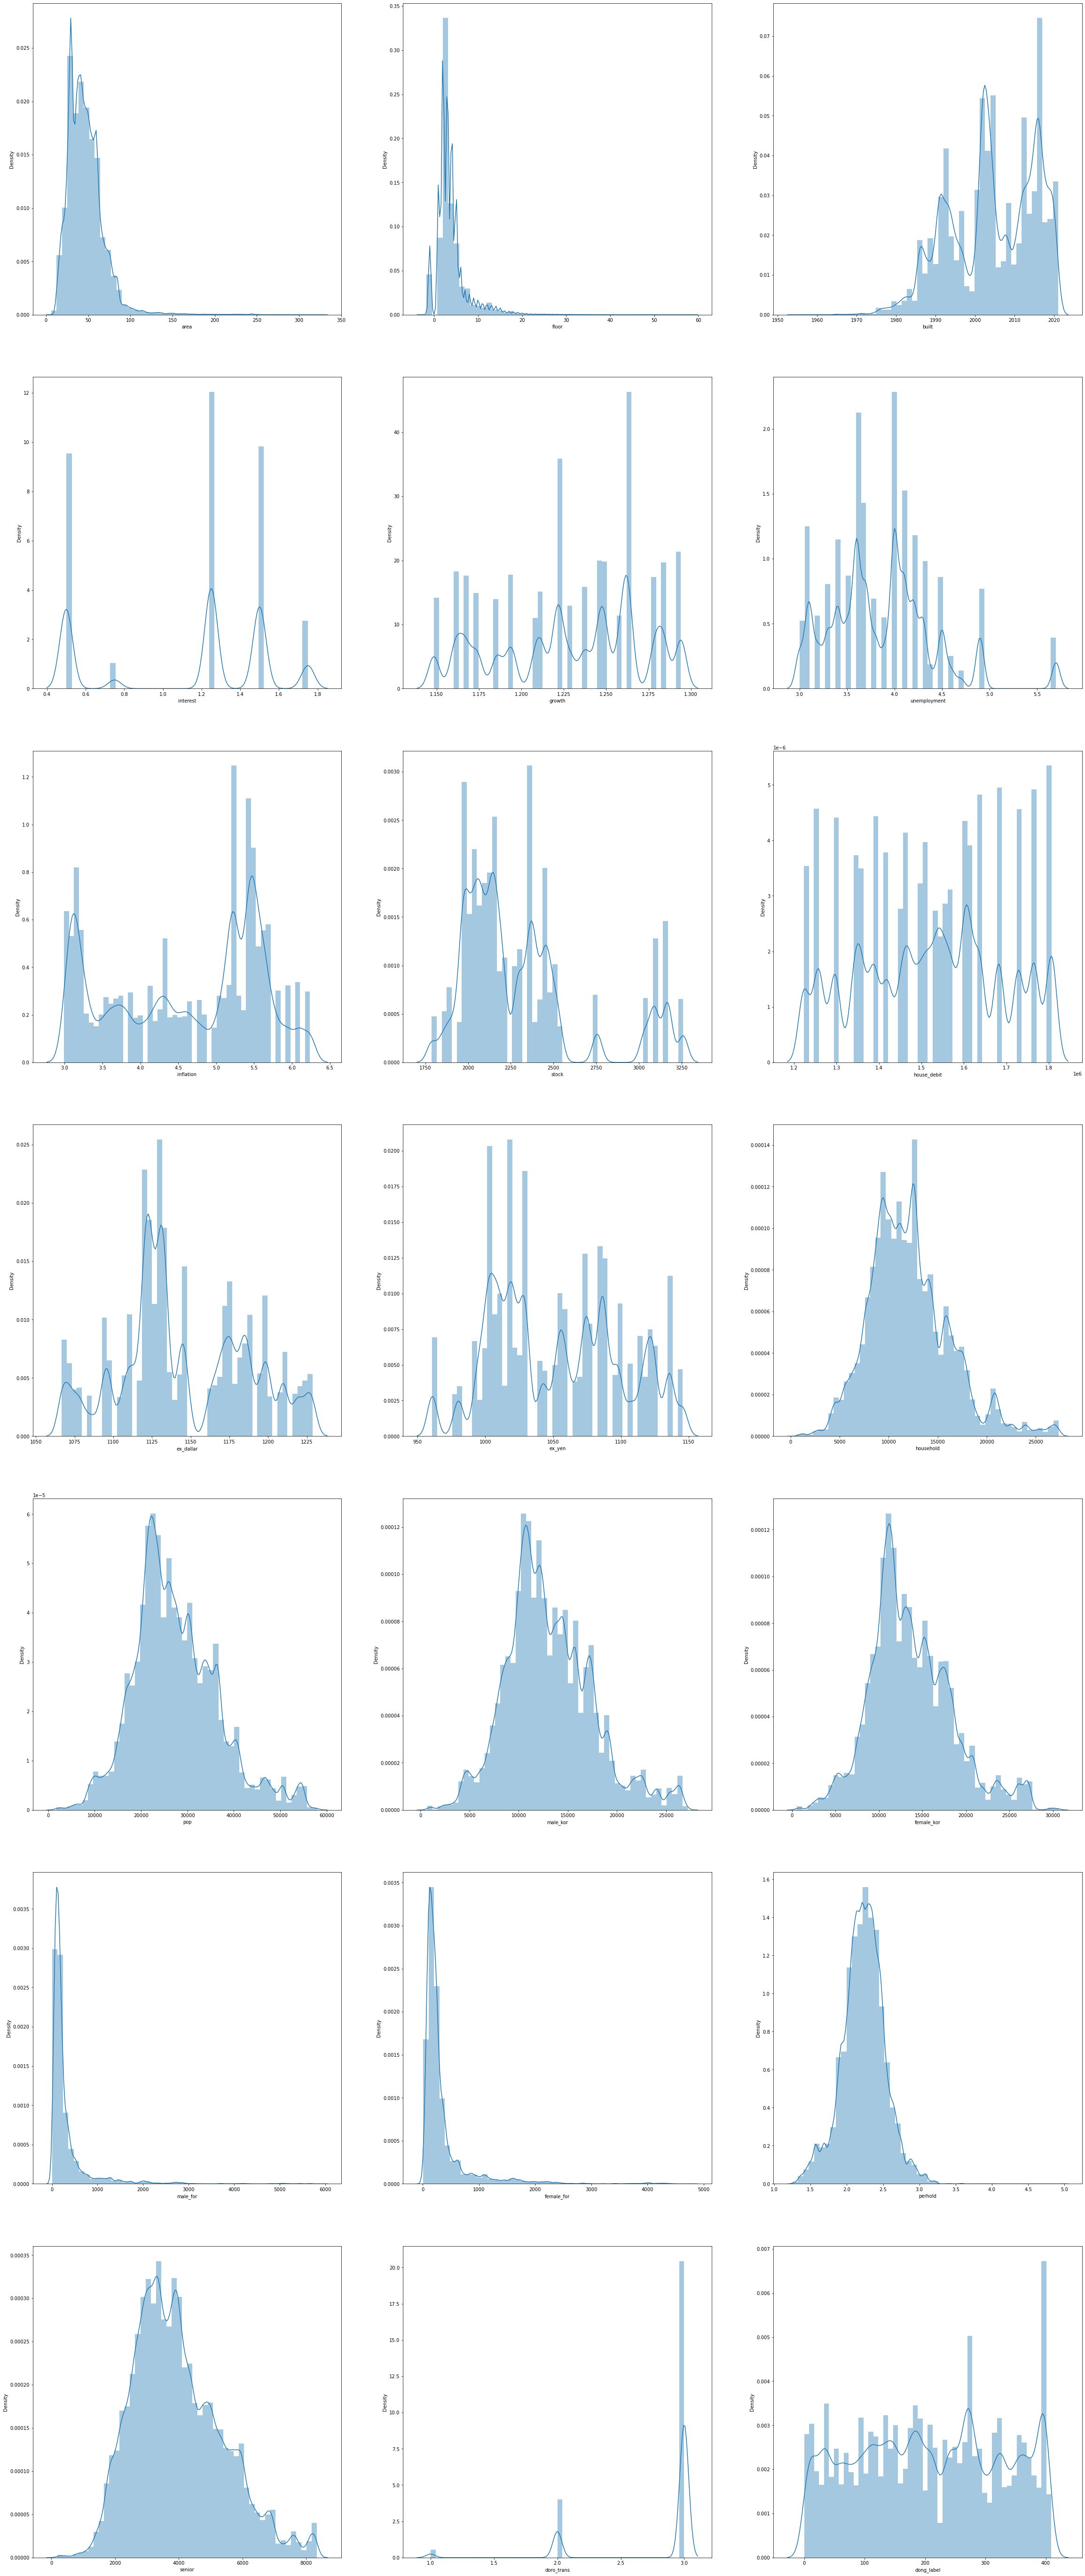

In [424]:
ncol = 3
nrow = int(len(num_col)/ncol)
fig, ax = plt.subplots(ncols = ncol,nrows =  nrow, sharex= False)
fig.set_size_inches(40, 100)
sns.plotting_context(font_scale = 3)


data_num = data[num_col]
for i in range(len(num_col)):
    sns.distplot(data_num.iloc[:,i], ax = ax[i//3, i%3])

# built, interest,
# doro trans


# look into: "built", "interest", "growth", "unemployment", "inflation", "stock","house_debit","dong_label"

<AxesSubplot:xlabel='price', ylabel='Density'>

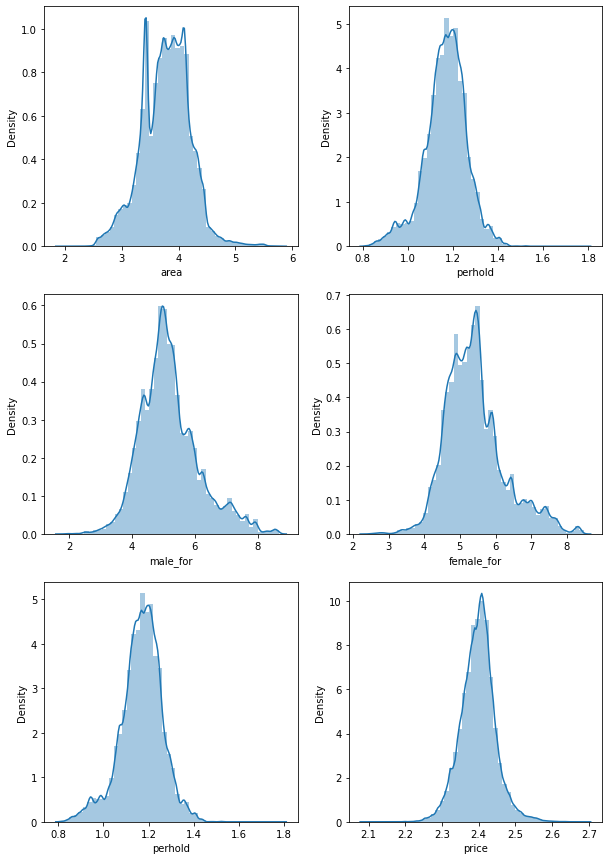

In [417]:
fig, ax = plt.subplots(3,2, sharex= False, figsize = (10,15))

sns.distplot(np.log1p(data_num["area"]), ax = ax[0,0])
sns.distplot(np.log1p(data_num["perhold"]), ax = ax[0,1])
sns.distplot(np.log1p(data_num["male_for"]), ax = ax[1,0])
sns.distplot(np.log1p(data_num["female_for"]), ax = ax[1,1])
sns.distplot(np.log1p(data_num["perhold"]), ax = ax[2,0])
sns.distplot(np.log1p(np.log1p(target)), ax = ax[2,1])


In [484]:
cat_col = list(set(data.columns.to_list()) - set(num_col) - set(log_col))
print(num_col)
print(log_col)
print(cat_col)

    
    
    

['area', 'floor', 'built', 'growth', 'unemployment', 'inflation', 'stock', 'house_debit', 'ex_dallar', 'ex_yen', 'household', 'pop', 'male_kor', 'female_kor', 'male_for', 'female_for', 'perhold', 'senior', 'dong_label']
['area', 'floor', 'male_for', 'female_for', 'perhold']
['gu', 'doro_trans', 'doro', 'date', 'tradetype', 'dong', 'interest']


<AxesSubplot:xlabel='built', ylabel='Density'>

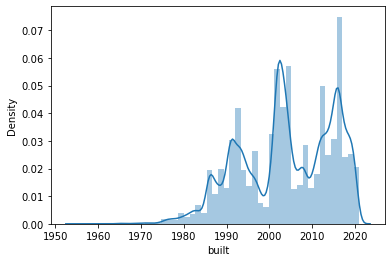

In [490]:
# look into: "built", "interest", "growth", "unemployment", "inflation", "stock","house_debit"

# print(data[""].value_counts())
sns.distplot((data["built"]))


In [506]:
# data["built"].value_counts()


    


In [525]:

data[data["year_gap"] == -1]

,date,gu,dong,area,floor,built,doro,tradetype,interest,growth,unemployment,inflation,stock,house_debit,ex_dallar,ex_yen,household,pop,male_kor,female_kor,male_for,female_for,perhold,senior,doro_trans,dong_label,year_trans,year_gap
2302,2020-12,광진구,자양3동,44.920,6,2021,자양번영로11길 32,1,0.50,1.26234,4.1,5.62232,2755.77,1727916.0,1095.13,1054.81,11178,28957,13771,14916,114,156,2.57,4050,3,319,2020,-1
24220,2020-12,양천구,신월5동,51.960,3,2021,월정로46길 9,1,0.50,1.26234,4.1,5.62232,2755.77,1727916.0,1095.13,1054.81,6484,15189,7453,7591,57,88,2.32,2386,3,244,2020,-1
29089,2020-10,서대문구,신촌동,17.750,8,2021,신촌로 63,4,0.50,1.26234,3.7,5.56098,2357.82,1727916.0,1144.68,1088.09,13304,23051,8589,10675,926,2861,1.45,2217,2,253,2020,-1
45437,2019-12,강서구,화곡본동,24.870,6,2020,초록마을로34길 85,1,1.25,1.27874,3.4,5.26499,2147.01,1600600.7,1175.84,1077.22,16515,35918,17339,18146,180,253,2.15,4552,3,400,2019,-1
45438,2019-12,강서구,화곡본동,24.870,5,2020,초록마을로34길 85,1,1.25,1.27874,3.4,5.26499,2147.01,1600600.7,1175.84,1077.22,16515,35918,17339,18146,180,253,2.15,4552,3,400,2019,-1
100794,2020-11,영등포구,신길3동,24.370,14,2021,가마산로 466,1,0.50,1.26234,3.4,5.59435,2504.18,1727916.0,1116.76,1069.40,7659,18086,8320,8576,656,534,2.21,3090,2,222,2020,-1
167114,2019-12,서초구,방배2동,21.350,10,2020,방배천로22길 4,1,1.25,1.27874,3.4,5.26499,2147.01,1600600.7,1175.84,1077.22,8792,20958,9782,11021,79,76,2.37,3364,3,127,2019,-1
167119,2019-12,서초구,방배2동,24.384,10,2020,방배천로22길 4,1,1.25,1.27874,3.4,5.26499,2147.01,1600600.7,1175.84,1077.22,8792,20958,9782,11021,79,76,2.37,3364,3,127,2019,-1
214598,2019-11,서초구,방배2동,24.384,11,2020,방배천로22길 4,1,1.25,1.27874,3.1,5.22839,2128.79,1600600.7,1167.45,1072.87,8792,20958,9782,11021,79,76,2.37,3364,3,127,2019,-1
214667,2019-12,구로구,가리봉동,35.920,3,2020,남부순환로105나길 19,1,1.25,1.27874,3.4,5.26499,2147.01,1600600.7,1175.84,1077.22,5831,15250,5071,4279,3711,2189,1.60,2031,3,2,2019,-1
